<a href="https://colab.research.google.com/github/DumbMachine/CV_Implementation/blob/master/ALL_CNN(SFS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from keras.models import Sequential
from keras.layers import Dropout,Activation,Conv2D,GlobalAveragePooling2D
from keras.optimizers import SGD

In [86]:
import sys
import keras 
print("Python Version : {}".format(sys.version))
print("Keras Version : {}".format(keras.__version__))

Python Version : 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
Keras Version : 2.2.4


In [0]:
#loading the data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [88]:
#Dimension of the training and test dataset
print("Dimensions of Training Data: {}".format(x_train.shape))
print("Dimensions of Test Data: {}".format(x_test.shape))

Dimensions of Training Data: (50000, 32, 32, 3)
Dimensions of Test Data: (10000, 32, 32, 3)


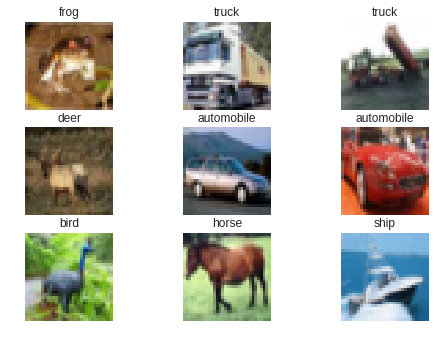

In [89]:
labelDict = {
    0:"airplanes",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck"
    }
#ploting some images
for i in range(0,9):
    plt.subplot(330+1+i)
    plt.title(labelDict[y_train[i][0]])
    plt.axis('off')
    img = x_train[i]
    plt.imshow(img)
    
plt.show()                       

In [0]:
#Preprocessing the datasets

#random seed for consistent results
seed = 6
np.random.seed(seed)

#loading the data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

#Noramalizing the dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255.0
x_test/=255.0

In [91]:
#labels
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [92]:
#one hot encoding the labels
y_trian = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_class = y_test.shape

print(y_train.shape)
print(y_test[0])

(50000, 1)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


![Model](https://cdn-images-1.medium.com/max/800/1*EGuklCK_C76MYFy_D3iNlw.png)
#Implementation of ALL-CNN-C

In [0]:
def allcnn(weights = None):
    model = Sequential()
       
    model.add(Conv2D(96,(3,3), padding = 'same' , input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding='same', strides = (2,2)))
    model.add(Dropout(0.4))
              
    model.add(Conv2D(192,(3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3), padding='same', strides = (2,2)))
    model.add(Dropout(0.4))
              
    model.add(Conv2D(192,(3,3), padding= 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3), padding= 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1), padding= 'valid'))
    
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    if weights:
        model.local_weights(weights)
        
        
    return model

In [94]:
#hyperpaparmets
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

model = allcnn()

sgd = SGD(lr=learning_rate , decay = weight_decay , momentum=momentum, nesterov= True)
model.compile(loss='categorical_crossentropy' , optimizer= sgd , metrics =['accuracy'])

#Summary of the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 192)       166080    
__________

In [95]:
epochs = 10
batch_size = 32

history = model.fit(x_train,y_trian , validation_data=(x_test,y_test),epochs=epochs,batch_size=batch_size , verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 67s 1ms/step - loss: 1.9035 - acc: 0.2910 - val_loss: 1.5858 - val_acc: 0.4252
Epoch 2/10
50000/50000 [==============================] - 67s 1ms/step - loss: 1.4464 - acc: 0.4718 - val_loss: 1.2886 - val_acc: 0.5250
Epoch 3/10
50000/50000 [==============================] - 66s 1ms/step - loss: 1.1909 - acc: 0.5729 - val_loss: 1.0850 - val_acc: 0.6217
Epoch 4/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.9447 - acc: 0.6681 - val_loss: 0.8968 - val_acc: 0.6896
Epoch 5/10
50000/50000 [==============================] - 67s 1ms/step - loss: 0.7752 - acc: 0.7272 - val_loss: 0.7526 - val_acc: 0.7368
Epoch 6/10
50000/50000 [==============================] - 65s 1ms/step - loss: 0.6655 - acc: 0.7683 - val_loss: 0.6784 - val_acc: 0.7645
Epoch 7/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.5856 - acc: 0.7968 - val_loss: 0.6397 - val_acc

In [96]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5976737236499786
Test accuracy: 0.8089


In [97]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


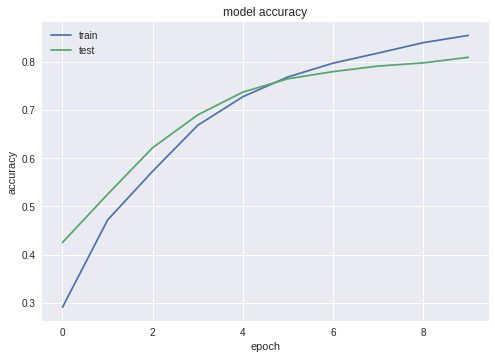

In [98]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


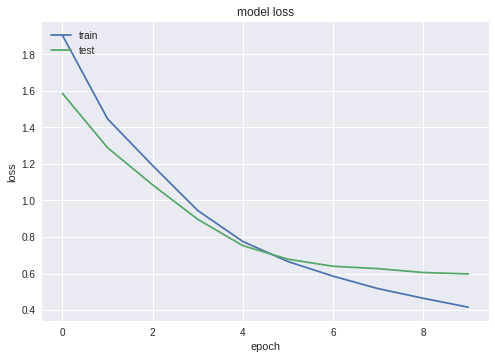

In [99]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

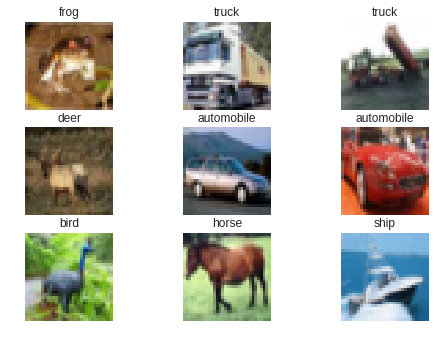

In [100]:
#Testing
for i in range(0,9):
    pred = model.predict(x_train[i].reshape(1,32,32,3)).reshape(10).tolist()
    plt.subplot(330+1+i)
    plt.title(labelDict[pred.index(max(pred))])
    plt.axis('off')
    img = x_train[i]
    plt.imshow(img)
    
plt.show() 

In [0]:
#Saving the model as .h5 file
model.save("keras-cifar10.h5")
#Saving the model as .json file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [102]:
!ls

keras-cifar10.h5  model.json  sample_data
